In [1]:
import numpy as np
import mne
from mne.preprocessing import ICA
from sklearn import decomposition
from matplotlib import pyplot as plt

In [2]:
train_autokl = np.load('../cache/thingseeg2_preproc/extracted_embeddings/train_autokl.npy', mmap_mode='r')
train_cliptext = np.load('../cache/thingseeg2_preproc/extracted_embeddings/train_cliptext.npy', mmap_mode='r')
train_clipvision = np.load('../cache/thingseeg2_preproc/extracted_embeddings/train_clipvision.npy', mmap_mode='r')
test_autokl = np.load('../cache/thingseeg2_preproc/extracted_embeddings/test_autokl.npy', mmap_mode='r')
test_cliptext = np.load('../cache/thingseeg2_preproc/extracted_embeddings/test_cliptext.npy', mmap_mode='r')
test_clipvision = np.load('../cache/thingseeg2_preproc/extracted_embeddings/test_clipvision.npy', mmap_mode='r')
print(train_autokl.shape, train_cliptext.shape, train_clipvision.shape)
print(test_autokl.shape, test_cliptext.shape, test_clipvision.shape)
# train_autokl = train_autokl[..., np.newaxis]
# test_autokl = test_autokl[..., np.newaxis]
# train_autokl = train_autokl.T
# test_autokl = test_autokl.T
train_cliptext = train_cliptext[:,0]
test_cliptext = test_cliptext[:,0]
train_clipvision = train_clipvision[:,0]
test_clipvision = test_clipvision[:,0]
# train_cliptext = train_cliptext.reshape(train_cliptext.shape[0], -1).T
# train_cliptext = train_cliptext[..., np.newaxis]
# test_cliptext = test_cliptext.reshape(test_cliptext.shape[0], -1).T
# test_cliptext = test_cliptext[..., np.newaxis]
# train_clipvision = train_clipvision.reshape(train_clipvision.shape[0], -1).T
# train_clipvision = train_clipvision[..., np.newaxis]
# test_clipvision = test_clipvision.reshape(test_clipvision.shape[0], -1).T
# test_clipvision = test_clipvision[..., np.newaxis]
print(train_autokl.shape, train_cliptext.shape, train_clipvision.shape)
print(test_autokl.shape, test_cliptext.shape, test_clipvision.shape)

(16540, 91168) (16540, 77, 768) (16540, 257, 768)
(200, 91168) (200, 77, 768) (200, 257, 768)
(16540, 91168) (16540, 768) (16540, 768)
(200, 91168) (200, 768) (200, 768)


In [3]:
n_components = 768
# ica_estimator = decomposition.FastICA(
#     n_components=n_components, max_iter=400, whiten="arbitrary-variance", tol=15e-5
# )
ica_estimator = decomposition.FastICA(
    n_components=n_components, whiten="arbitrary-variance"
)
pca_estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)


In [4]:
ica_estimator.fit(train_clipvision)

/home/AD/tfei/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


FastICA(n_components=768, whiten='arbitrary-variance')

In [11]:
pca_estimator.fit(train_clipvision)

PCA(n_components=768, svd_solver='randomized', whiten=True)

In [13]:
spca_estimator = decomposition.SparsePCA(
    n_components=n_components, alpha=0.1, ridge_alpha=0.01, max_iter=100
)
spca_estimator.fit(train_clipvision)

SparsePCA(alpha=0.1, max_iter=100, n_components=730)

In [14]:
S_ica = ica_estimator.transform(train_clipvision)  # Get the independent components
S_pca = pca_estimator.transform(train_clipvision)  # Get the independent components
S_spca = spca_estimator.transform(train_clipvision)  # Get the independent components

In [9]:
# Determine the number of components to use using the explained variance criterion
explained_variance = np.var(S_ica, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
explained_variance.shape, explained_variance_ratio.shape, n_components

((768,), (768,), 730)

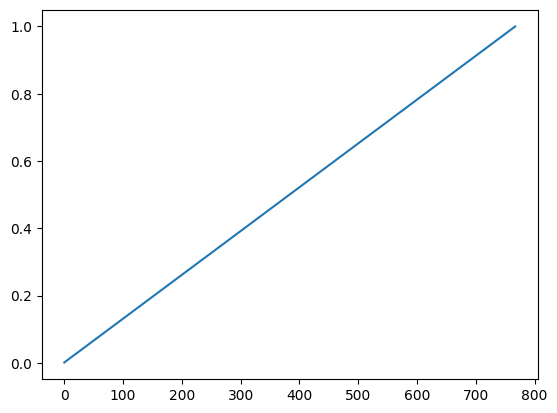

In [10]:
# plt.plot(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))

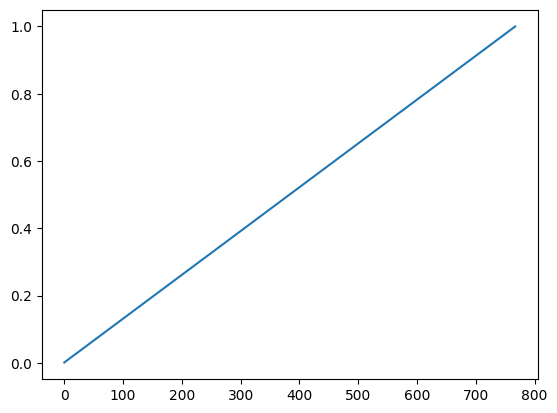

In [15]:
explained_variance = np.var(S_pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
explained_variance.shape, explained_variance_ratio.shape, n_components
plt.plot(np.cumsum(explained_variance_ratio))

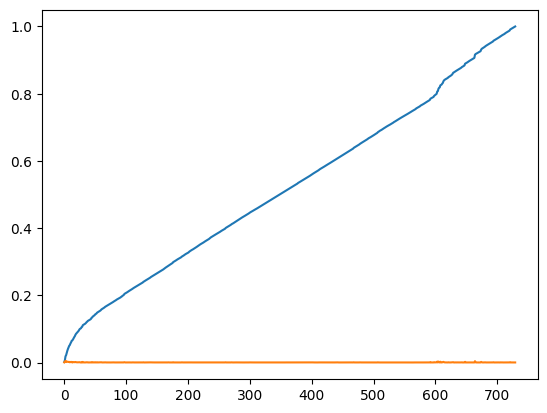

In [17]:
explained_variance = np.var(S_spca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
explained_variance.shape, explained_variance_ratio.shape, n_components
plt.plot(np.cumsum(explained_variance_ratio))
plt.plot(explained_variance)